In [65]:
import pandas as pd
df1=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_file1.csv')
df2=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_file2.csv')

In [66]:
#Making it years campatible
df_2021=df1
df_2023=df2[0:5832]
df_2022=df2[5832:8760]
print(df_2023)

      Unnamed: 0  values  date  month  year  hour
0              0   4.428     1      1  2023     0
1              1   4.220     1      1  2023     1
2              2   4.084     1      1  2023     2
3              3   6.180     1      1  2023     3
4              4   4.300     1      1  2023     4
...          ...     ...   ...    ...   ...   ...
5827        5827   2.988    31      8  2023    19
5828        5828   3.568    31      8  2023    20
5829        5829   4.572    31      8  2023    21
5830        5830   4.600    31      8  2023    22
5831        5831   4.580    31      8  2023    23

[5832 rows x 6 columns]


In [67]:
df_2023[df_2023['month']==3][df_2023['hour']==12]['date'].value_counts()
## 3 month 12 is more and 23 is less..
## 3 month 12 hour and 26 date ka kam karo
## 3 month 23 hour and 26 date ka jyada karo
indexes_to_drop = df_2023[(df_2023['month'] == 3) & (df_2023['hour'] == 12) & (df_2023['date'] == 26)].index.tolist()
df_2023=df_2023.drop(indexes_to_drop[1])
df_2023=df_2023.reset_index(drop=True)
print(len(df_2023))
new_row = pd.DataFrame([{
    'year': 2023,
    'month': 3,
    'date': 26,
    'hour': 23,
    'values': 6
}])
df_2023 = pd.concat([df_2023, new_row], ignore_index=True)
print(len(df_2023))
df_2023 = df_2023.sort_values(by=['year', 'month', 'date', 'hour'])
df_2023

5831
5832


/tmp/ipykernel_2016/1942034245.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023[df_2023['month']==3][df_2023['hour']==12]['date'].value_counts()


,Unnamed: 0,values,date,month,year,hour
0,0.0,4.428,1,1,2023,0
1,1.0,4.220,1,1,2023,1
2,2.0,4.084,1,1,2023,2
3,3.0,6.180,1,1,2023,3
4,4.0,4.300,1,1,2023,4
...,...,...,...,...,...,...
5826,5827.0,2.988,31,8,2023,19
5827,5828.0,3.568,31,8,2023,20
5828,5829.0,4.572,31,8,2023,21
5829,5830.0,4.600,31,8,2023,22


In [68]:
df_2023[df_2023['month']==3]['hour'].value_counts()

hour
0     31
1     31
22    31
21    31
20    31
19    31
18    31
17    31
16    31
15    31
14    31
13    31
12    31
11    31
10    31
9     31
8     31
7     31
6     31
5     31
4     31
3     31
2     31
23    31
Name: count, dtype: int64

In [69]:
#Extrapolating the 2022 using the 2023 and 2021
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,5832,4.312,1,9,2022,0
1,5833,4.356,1,9,2022,1
2,5834,4.560,1,9,2022,2
3,5835,4.464,1,9,2022,3
4,5836,4.572,1,9,2022,4
...,...,...,...,...,...,...
2923,8755,10.180,31,12,2022,19
2924,8756,4.484,31,12,2022,20
2925,8757,4.356,31,12,2022,21
2926,8758,4.384,31,12,2022,22


In [70]:
df_2023

,Unnamed: 0,values,date,month,year,hour
0,0.0,4.428,1,1,2023,0
1,1.0,4.220,1,1,2023,1
2,2.0,4.084,1,1,2023,2
3,3.0,6.180,1,1,2023,3
4,4.0,4.300,1,1,2023,4
...,...,...,...,...,...,...
5826,5827.0,2.988,31,8,2023,19
5827,5828.0,3.568,31,8,2023,20
5828,5829.0,4.572,31,8,2023,21
5829,5830.0,4.600,31,8,2023,22


In [71]:
new_rows_data=pd.DataFrame(columns=['hour','date','year','values'])
for i in range (0,5832):
  df_2022.loc[2928+i,'hour']=df_2023.iloc[i]['hour']
  df_2022.loc[2928+i,'date']=df_2023.iloc[i]['date']
  df_2022.loc[2928+i,'year']=2022
  df_2022.loc[2928+i,'month']=df_2023.iloc[i]['month']
  df_2022.loc[2928+i,'values']=(((float(df_2023.iloc[i]['values']))+float(df_2021.iloc[i]['values']))/2)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

,Unnamed: 0,values,date,month,year,hour
0,NaN,4.056,1.0,1.0,2022.0,0.0
1,NaN,3.399,1.0,1.0,2022.0,1.0
2,NaN,3.916,1.0,1.0,2022.0,2.0
3,NaN,4.067,1.0,1.0,2022.0,3.0
4,NaN,3.781,1.0,1.0,2022.0,4.0
...,...,...,...,...,...,...
8755,8755.0,10.180,31.0,12.0,2022.0,19.0
8756,8756.0,4.484,31.0,12.0,2022.0,20.0
8757,8757.0,4.356,31.0,12.0,2022.0,21.0
8758,8758.0,4.384,31.0,12.0,2022.0,22.0


In [72]:
df_2022[df_2022['month']==12]['hour'].value_counts()

hour
0.0     31
1.0     31
22.0    31
21.0    31
20.0    31
19.0    31
18.0    31
17.0    31
16.0    31
15.0    31
14.0    31
13.0    31
12.0    31
11.0    31
10.0    31
9.0     31
8.0     31
7.0     31
6.0     31
5.0     31
4.0     31
3.0     31
2.0     31
23.0    31
Name: count, dtype: int64

In [73]:
df_2022

,Unnamed: 0,values,date,month,year,hour
0,NaN,4.056,1.0,1.0,2022.0,0.0
1,NaN,3.399,1.0,1.0,2022.0,1.0
2,NaN,3.916,1.0,1.0,2022.0,2.0
3,NaN,4.067,1.0,1.0,2022.0,3.0
4,NaN,3.781,1.0,1.0,2022.0,4.0
...,...,...,...,...,...,...
8755,8755.0,10.180,31.0,12.0,2022.0,19.0
8756,8756.0,4.484,31.0,12.0,2022.0,20.0
8757,8757.0,4.356,31.0,12.0,2022.0,21.0
8758,8758.0,4.384,31.0,12.0,2022.0,22.0


In [74]:
df_2023[df_2023['month']==3]['hour'].value_counts()

hour
0     31
1     31
22    31
21    31
20    31
19    31
18    31
17    31
16    31
15    31
14    31
13    31
12    31
11    31
10    31
9     31
8     31
7     31
6     31
5     31
4     31
3     31
2     31
23    31
Name: count, dtype: int64

In [75]:
#Extrapolating the 2023 using the 2022 and 2021
new_rows_data=[]
for i in range (5832,8760):
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']
  df_2023.loc[i,'date']=df_2022.iloc[i]['date']
  df_2023.loc[i,'year']=2023
  df_2023.loc[i,'month']=df_2022.iloc[i]['month']
  df_2023.loc[i,'values']=(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])
  # new_row_data={'hour':df_2022.iloc[i]['hour'],'date':df_2022.iloc[i]['date'],'year':2023,'month':df_2022.iloc[i]['month'],'values':(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])}
  # new_rows_data.append(new_row_data)
# df_2023=df_2023.append(new_rows_data,ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023

,Unnamed: 0,values,date,month,year,hour
0,0.0,4.428,1.0,1.0,2023.0,0.0
1,1.0,4.220,1.0,1.0,2023.0,1.0
2,2.0,4.084,1.0,1.0,2023.0,2.0
3,3.0,6.180,1.0,1.0,2023.0,3.0
4,4.0,4.300,1.0,1.0,2023.0,4.0
...,...,...,...,...,...,...
8755,NaN,12.474,31.0,12.0,2023.0,19.0
8756,NaN,7.054,31.0,12.0,2023.0,20.0
8757,NaN,5.694,31.0,12.0,2023.0,21.0
8758,NaN,6.822,31.0,12.0,2023.0,22.0


In [76]:
#Extrapolating the 2020,2019,2018 using 2021,2022,2023
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((2 * values_2019) - (values_2020))


    df_2020.loc[i,'hour']=df_2021.iloc[i]['hour']
    df_2020.loc[i,'month']=df_2021.iloc[i]['month']
    df_2020.loc[i,'date']=df_2021.iloc[i]['date']
    df_2020.loc[i,'year']=2020
    df_2020.loc[i,'values']=values_2020


    df_2019.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2019.loc[i,'month']=df_2020.iloc[i]['month']
    df_2019.loc[i,'date']=df_2020.iloc[i]['date']
    df_2019.loc[i,'year']=2019
    df_2019.loc[i,'values']=values_2019

    df_2018.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2018.loc[i,'month']=df_2020.iloc[i]['month']
    df_2018.loc[i,'date']=df_2020.iloc[i]['date']
    df_2018.loc[i,'year']=2018
    df_2018.loc[i,'values']=values_2018

print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)
df_2023.to_csv('NO_2023.csv')
df_2022.to_csv('NO_2022.csv')
df_2021.to_csv('NO_2021.csv')
df_2020.to_csv('NO_2020.csv')
df_2019.to_csv('NO_2019.csv')
df_2018.to_csv('NO_2018.csv')

DataFrame for 2023:
      Unnamed: 0  values  date  month    year  hour
0            0.0   4.428   1.0    1.0  2023.0   0.0
1            1.0   4.220   1.0    1.0  2023.0   1.0
2            2.0   4.084   1.0    1.0  2023.0   2.0
3            3.0   6.180   1.0    1.0  2023.0   3.0
4            4.0   4.300   1.0    1.0  2023.0   4.0
...          ...     ...   ...    ...     ...   ...
8755         NaN  12.474  31.0   12.0  2023.0  19.0
8756         NaN   7.054  31.0   12.0  2023.0  20.0
8757         NaN   5.694  31.0   12.0  2023.0  21.0
8758         NaN   6.822  31.0   12.0  2023.0  22.0
8759         NaN  10.520  31.0   12.0  2023.0  23.0

[8760 rows x 6 columns]
DataFrame for 2022:
      Unnamed: 0  values  date  month    year  hour
0            NaN   4.056   1.0    1.0  2022.0   0.0
1            NaN   3.399   1.0    1.0  2022.0   1.0
2            NaN   3.916   1.0    1.0  2022.0   2.0
3            NaN   4.067   1.0    1.0  2022.0   3.0
4            NaN   3.781   1.0    1.0  2022.0   4.0

In [77]:
#Table for the NO (6* 8760)
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=df_2023['values'].astype(float).round(2)
mixed_df['values_2022']=df_2022['values'].astype(float).round(2)
mixed_df['values_2021']=df_2021['values'].astype(float).round(2)
mixed_df['values_2020']=df_2020['values'].astype(float).round(2)
mixed_df['values_2019']=df_2019['values'].astype(float).round(2)
mixed_df['values_2018']=df_2018['values'].astype(float).round(2)
mixed_df.to_csv('NO_mixed.csv')
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,4.43,4.06,3.68,3.31,2.94,2.57
1,1.0,1.0,1.0,4.22,3.40,2.58,1.76,0.94,0.11
2,1.0,1.0,2.0,4.08,3.92,3.75,3.58,3.41,3.24
3,1.0,1.0,3.0,6.18,4.07,1.95,-0.16,-2.27,-4.38
4,1.0,1.0,4.0,4.30,3.78,3.26,2.74,2.22,1.71
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,12.47,10.18,7.89,5.59,3.30,1.00
8756,31.0,12.0,20.0,7.05,4.48,1.91,-0.66,-3.23,-5.80
8757,31.0,12.0,21.0,5.69,4.36,3.02,1.68,0.34,-1.00
8758,31.0,12.0,22.0,6.82,4.38,1.95,-0.49,-2.93,-5.37


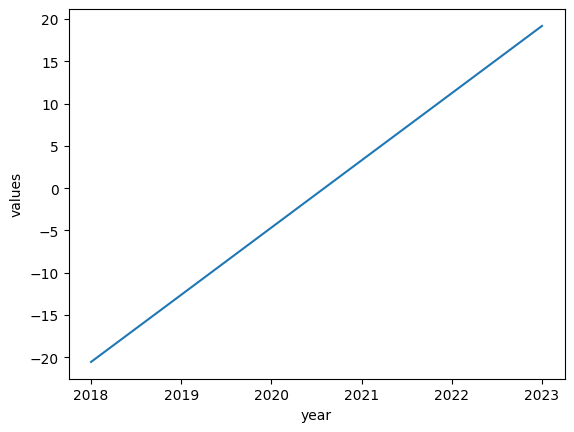

In [78]:
#Random Graph Generator
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]

plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()

In [79]:
mixed_df[mixed_df['month']==3]['hour'].value_counts()

hour
0.0     31
1.0     31
22.0    31
21.0    31
20.0    31
19.0    31
18.0    31
17.0    31
16.0    31
15.0    31
14.0    31
13.0    31
12.0    31
11.0    31
10.0    31
9.0     31
8.0     31
7.0     31
6.0     31
5.0     31
4.0     31
3.0     31
2.0     31
23.0    31
Name: count, dtype: int64